<a href="https://colab.research.google.com/github/konapalask/unsupervised-learning/blob/main/helmet_prediction_using_k_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install -q kaggle opencv-python matplotlib

# Upload your kaggle.json
from google.colab import files
files.upload()  # Upload your kaggle.json here

# Set up kaggle API key
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


Saving kaggle.json to kaggle.json


In [7]:
!kaggle datasets download -d aryanvaid13/indian-helmet-detection-dataset
!unzip -q indian-helmet-detection-dataset.zip -d helmet_dataset


Dataset URL: https://www.kaggle.com/datasets/aryanvaid13/indian-helmet-detection-dataset
License(s): unknown
indian-helmet-detection-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
replace helmet_dataset/README.dataset.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [8]:
import os

# Print folders and sample files
for root, dirs, files in os.walk("helmet_dataset"):
    print(root)



helmet_dataset
helmet_dataset/train
helmet_dataset/train/labels
helmet_dataset/train/images
helmet_dataset/valid
helmet_dataset/valid/labels
helmet_dataset/valid/images


In [14]:
import cv2
import numpy as np

# Correct paths
helmet_path = '/content/helmet_dataset/train/images'
nohelmet_path = '/content/helmet_dataset/valid/images'

def load_images(folder, label):
    images, labels = [], []
    for file in os.listdir(folder)[:50]:  # Load first 50 images
        img_path = os.path.join(folder, file)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (64, 64)).flatten()
            images.append(img)
            labels.append(label)
    return images, labels

helmet_imgs, helmet_labels = load_images(helmet_path, 1)
nohelmet_imgs, nohelmet_labels = load_images(nohelmet_path, 0)

X = np.array(helmet_imgs + nohelmet_imgs)
y_true = np.array(helmet_labels + nohelmet_labels)


In [15]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

# Reduce dimensions for clustering
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X)

# Clustering with KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
y_pred = kmeans.fit_predict(X_pca)

acc = max(accuracy_score(y_true, y_pred), accuracy_score(y_true, 1 - y_pred))
print("✅ Clustering Accuracy:", round(acc * 100, 2), "%")


✅ Clustering Accuracy: 50.0 %


In [24]:
# Determine which cluster represents 'Helmet'
acc1 = accuracy_score(y_true, y_pred)
acc2 = accuracy_score(y_true, 1 - y_pred)

if acc2 > acc1:
    print("ℹ️ Clusters were flipped.")
    helmet_cluster = 0
else:
    helmet_cluster = 1


In [32]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
import numpy as np

# Apply PCA
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X)

# Apply KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
y_pred = kmeans.fit_predict(X_pca)

# 🔍 Determine majority label in each cluster
cluster_to_label = {}

for cluster_id in np.unique(y_pred):
    # Find all samples in this cluster
    indices = np.where(y_pred == cluster_id)[0]
    cluster_labels = y_true[indices]

    # Count labels in the cluster and assign the most common one
    majority_label = np.bincount(cluster_labels).argmax()
    cluster_to_label[cluster_id] = majority_label

print("✅ Cluster → Label Mapping:", cluster_to_label)



✅ Cluster → Label Mapping: {np.int32(0): np.int64(0), np.int32(1): np.int64(0)}


Saving gettyimages-1284091102-612x612.jpg to gettyimages-1284091102-612x612 (3).jpg
Saving images (1).jpg to images (1) (3).jpg
Saving images.jpg to images (2).jpg
Saving Helmet-less-ride.jpg to Helmet-less-ride (5).jpg
Saving think-phenom-no-helmet-detection-system.jpg to think-phenom-no-helmet-detection-system (3).jpg


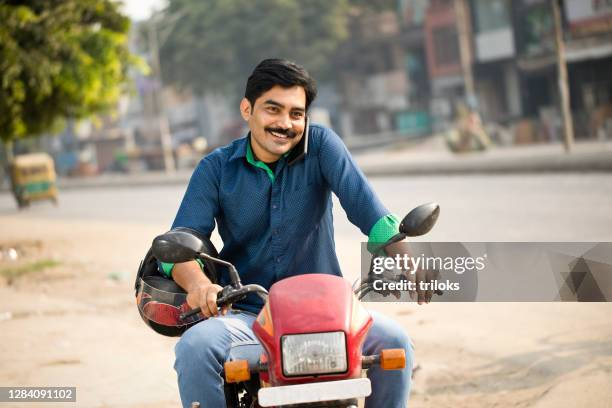

🔍 Prediction: 🪖 no Helmet


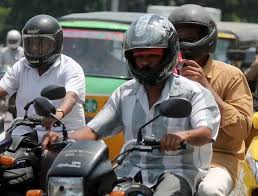

🔍 Prediction:  Helmet


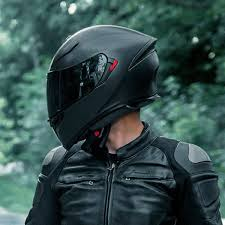

🔍 Prediction:  Helmet


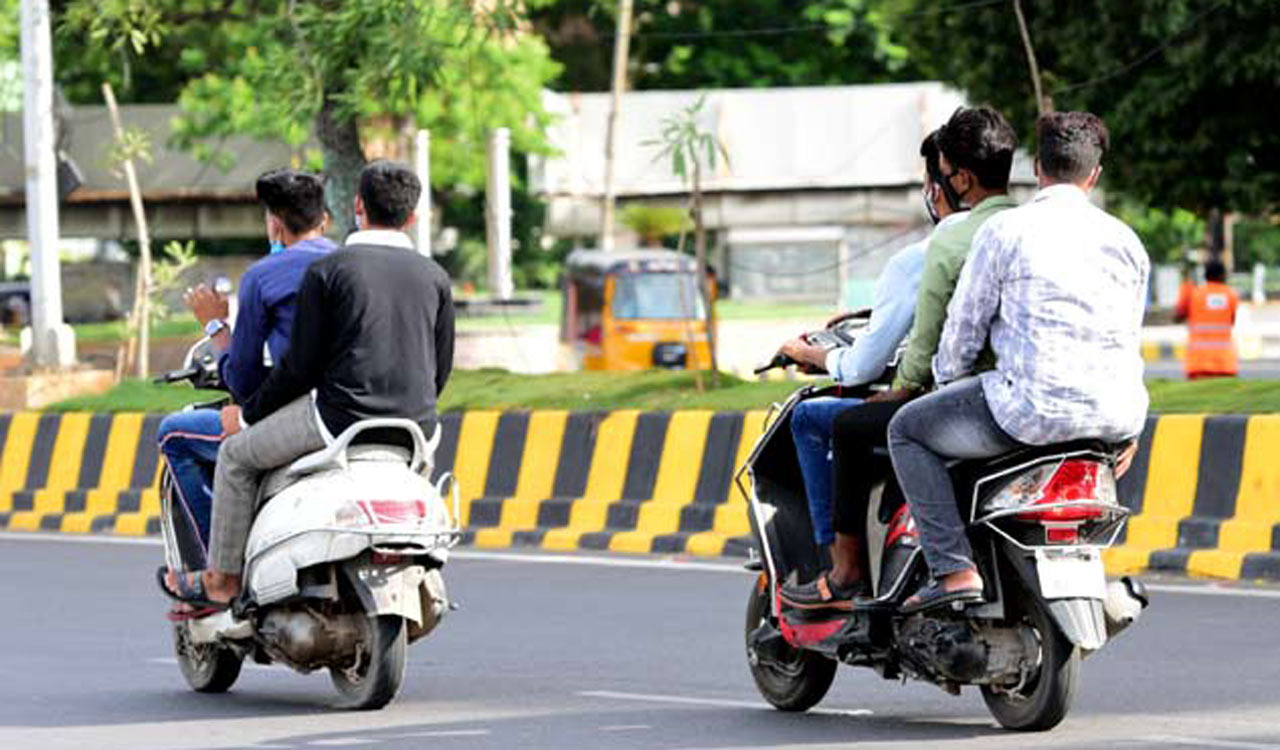

🔍 Prediction: 🪖 no Helmet


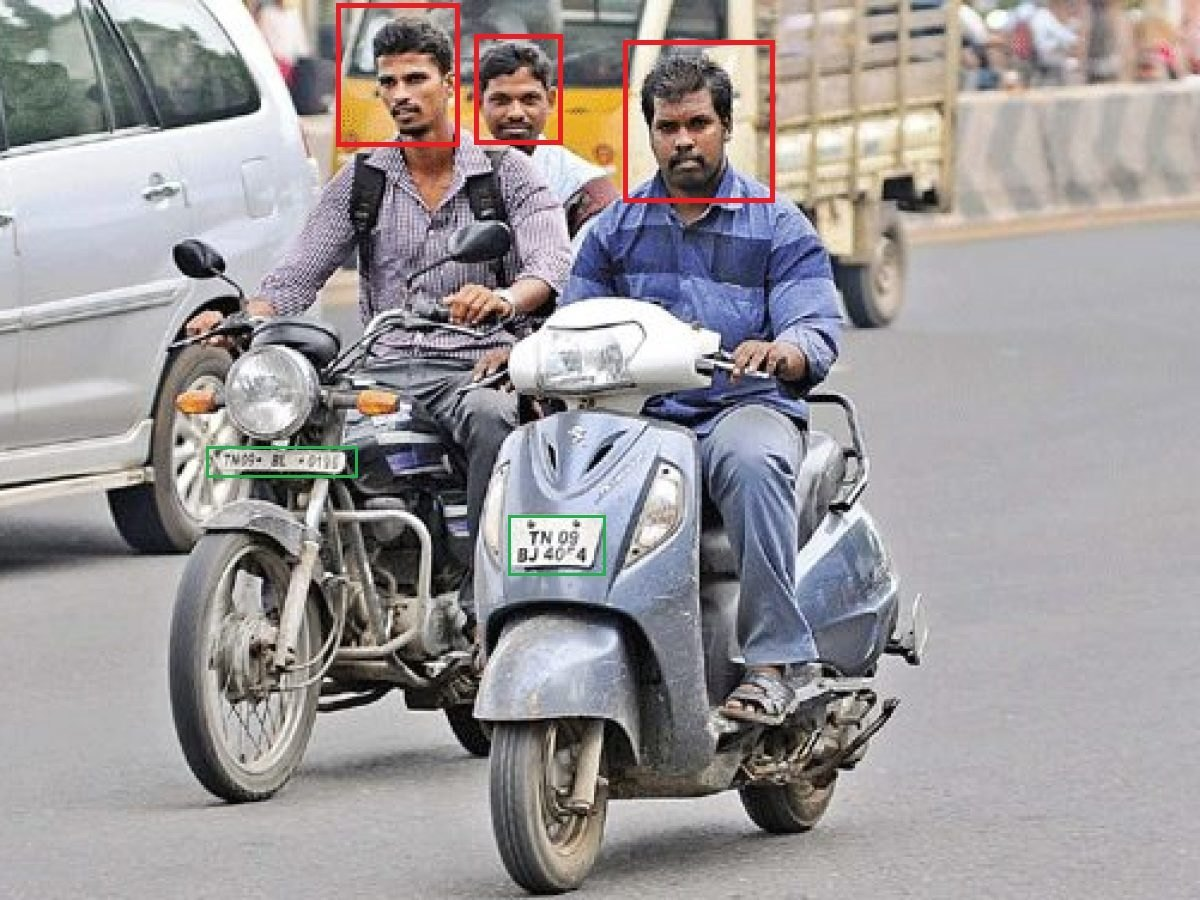

🔍 Prediction: 🪖 no Helmet


In [40]:
from google.colab import files
uploaded = files.upload()
from google.colab.patches import cv2_imshow
import cv2

for name in uploaded.keys():
    img = cv2.imread(name)
    img = cv2.resize(img, (64, 64)).flatten().reshape(1, -1)
    img_pca = pca.transform(img)
    cluster = kmeans.predict(img_pca)[0]

    cv2_imshow(cv2.imread(name))
    print("🔍 Prediction:", "🪖 no Helmet" if cluster == helmet_cluster else " Helmet")
